# King County House Sales analysis

## 1.0 Business Understanding

## 1.1 Problem Statement

## 1.2 Project Objectives

## 1.3 Context Real Estate prices in the county or state


## 2.0 Data Overview

## 3.0 Data Analysis Approach

## 4.0 Loading the Data 

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### 4.1 Data Inspection

In [3]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#finding unique entries in each column & trying to identify anomalies in the entries
unique_entries = {}
for column in data.columns:
    unique_entries[column] = data[column].unique()

print(unique_entries)

{'id': array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157], dtype=int64), 'date': array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/201

### 4.2 Data Cleaning

In [5]:
#check duplicates
data.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [6]:
#check for nulls 
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#exploring columns with nulls
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

Given majority of entries have entry 'NO' - we will make assumption and replace nan with 'NO'

In [9]:
data['waterfront'].fillna('NO', inplace=True)

In [10]:
data['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [11]:
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

From the above cell we see that 'NONE' is the predominant entry value in the view column, hence we will replace nan with 'NONE'

In [12]:
data['view'].fillna('NONE', inplace=True)

In [13]:
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [14]:
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

17011 rows have year entry as 0.0.. hence alot of missing data. Therefore we will not use this column for analysis but we will not drop it either to avoid loss of this data

In [15]:
#Handle non numeric data in sqft_basement column
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [16]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [17]:
#Replace rows with '?' with median value of 'sqft_basement' column

column_name = 'sqft_basement'
placeholder = '?' 

# Convert the column to numeric, excluding rows with the placeholder value
numeric_values = pd.to_numeric(data['sqft_basement'], errors='coerce')
filtered_values = numeric_values[numeric_values.notna()]

# median value for the filtered column
median_value = np.median(filtered_values)

# Replace the object values with the median value
data['sqft_basement'] = np.where(data['sqft_basement'] == placeholder, median_value, data['sqft_basement'])

In [18]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [19]:
# Convert dtype for 'sqft_basement' column from object to float64 to enable calculations
data.sqft_basement = data.sqft_basement.astype(float)

In [20]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [21]:
#reviewing unique values for categorical variables

columns = ['waterfront', 'view', 'condition', 'grade']

for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'waterfront':
['NO' 'YES']

Unique values for column 'view':
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

Unique values for column 'condition':
['Average' 'Very Good' 'Good' 'Poor' 'Fair']

Unique values for column 'grade':
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']



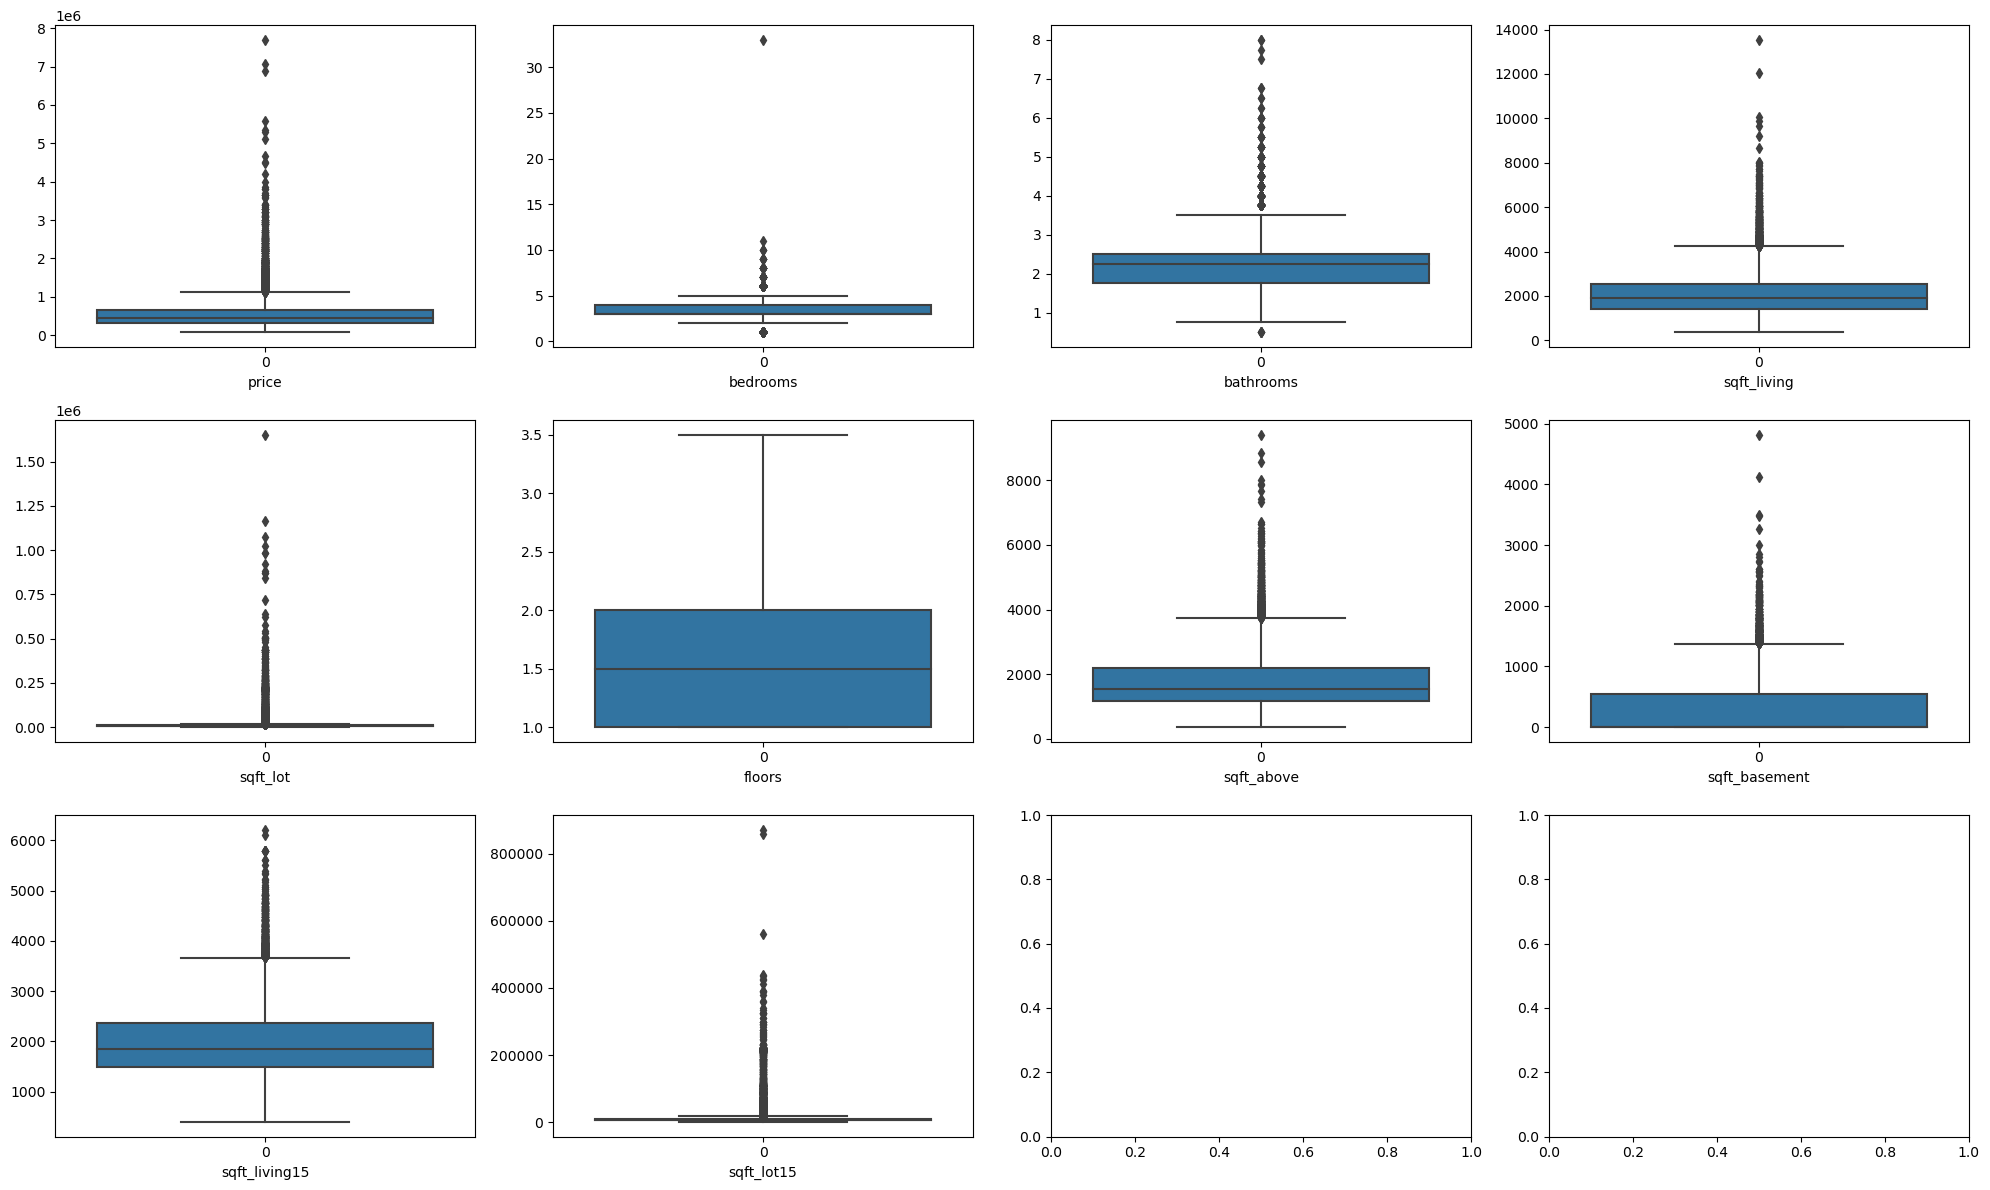

In [22]:
# Outlier Analysis for numeric variables
fig, axs = plt.subplots(3, 4, figsize=(20,12))

# Column names
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Iterate over the columns and create the box plots
for i, column in enumerate(columns):
    sns.boxplot(data[column], ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_xlabel(column)  

plt.tight_layout()

plt.show()

Observation - all numeric variables except floors have alot of outliers that need to be handled as below

In [23]:
# Handle outliers in numeric columns
columns_outlier = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'
                   , 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# function
def handle_outliers(column):
    q1 = np.percentile(data[column], 25)  # 1st quartile
    q3 = np.percentile(data[column], 75)  # 3rd quartile
    iqr = q3 - q1  # Interquartile range

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Exclude values outside the lower and upper bounds
    data[column] = np.where((data[column] >= lower_bound) & (data[column] <= upper_bound),
                            data[column], np.nan)

# Iterate over the columns and handle outliers
for column in columns:
    handle_outliers(column)

# Drop rows with outliers across all columns
data.dropna(inplace=True)

# Reset the index if needed
data.reset_index(drop=True, inplace=True)


## 5.0 Exploratory data analysis

EDA will enable understanding the data.

* It will bring out obvious multicollinearity
* It will also help in identify predictors with strong association with the target (price)

In [24]:
#Correlation matrix for numeric variables

numeric_df = data[['price', 'bedrooms','bathrooms', 'sqft_living','sqft_lot', 'floors','sqft_above', 'sqft_basement']]
numeric_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,1180.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,2170.0,400.0
2,604000.0,4.0,3.00,1960.0,5000.0,1.0,1050.0,910.0
3,510000.0,3.0,2.00,1680.0,8080.0,1.0,1680.0,0.0
4,257500.0,3.0,2.25,1715.0,6819.0,2.0,1715.0,0.0


In [25]:
#Correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()
correlation_matrix 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
price,1.000000,0.254250,0.381901,0.558078,-0.051682,0.251676,0.449579,0.213556
bedrooms,0.254250,1.000000,0.459627,0.606830,0.193933,0.146440,0.480671,0.244623
bathrooms,0.381901,0.459627,1.000000,0.685959,-0.056068,0.522006,0.601250,0.180644
sqft_living,0.558078,0.606830,0.685959,1.000000,0.186602,0.344336,0.838944,0.327320
sqft_lot,-0.051682,0.193933,-0.056068,0.186602,1.000000,-0.372038,0.145760,0.079041
floors,0.251676,0.146440,0.522006,0.344336,-0.372038,1.000000,0.536406,-0.309437
sqft_above,0.449579,0.480671,0.601250,0.838944,0.145760,0.536406,1.000000,-0.230380
sqft_basement,0.213556,0.244623,0.180644,0.327320,0.079041,-0.309437,-0.230380,1.000000


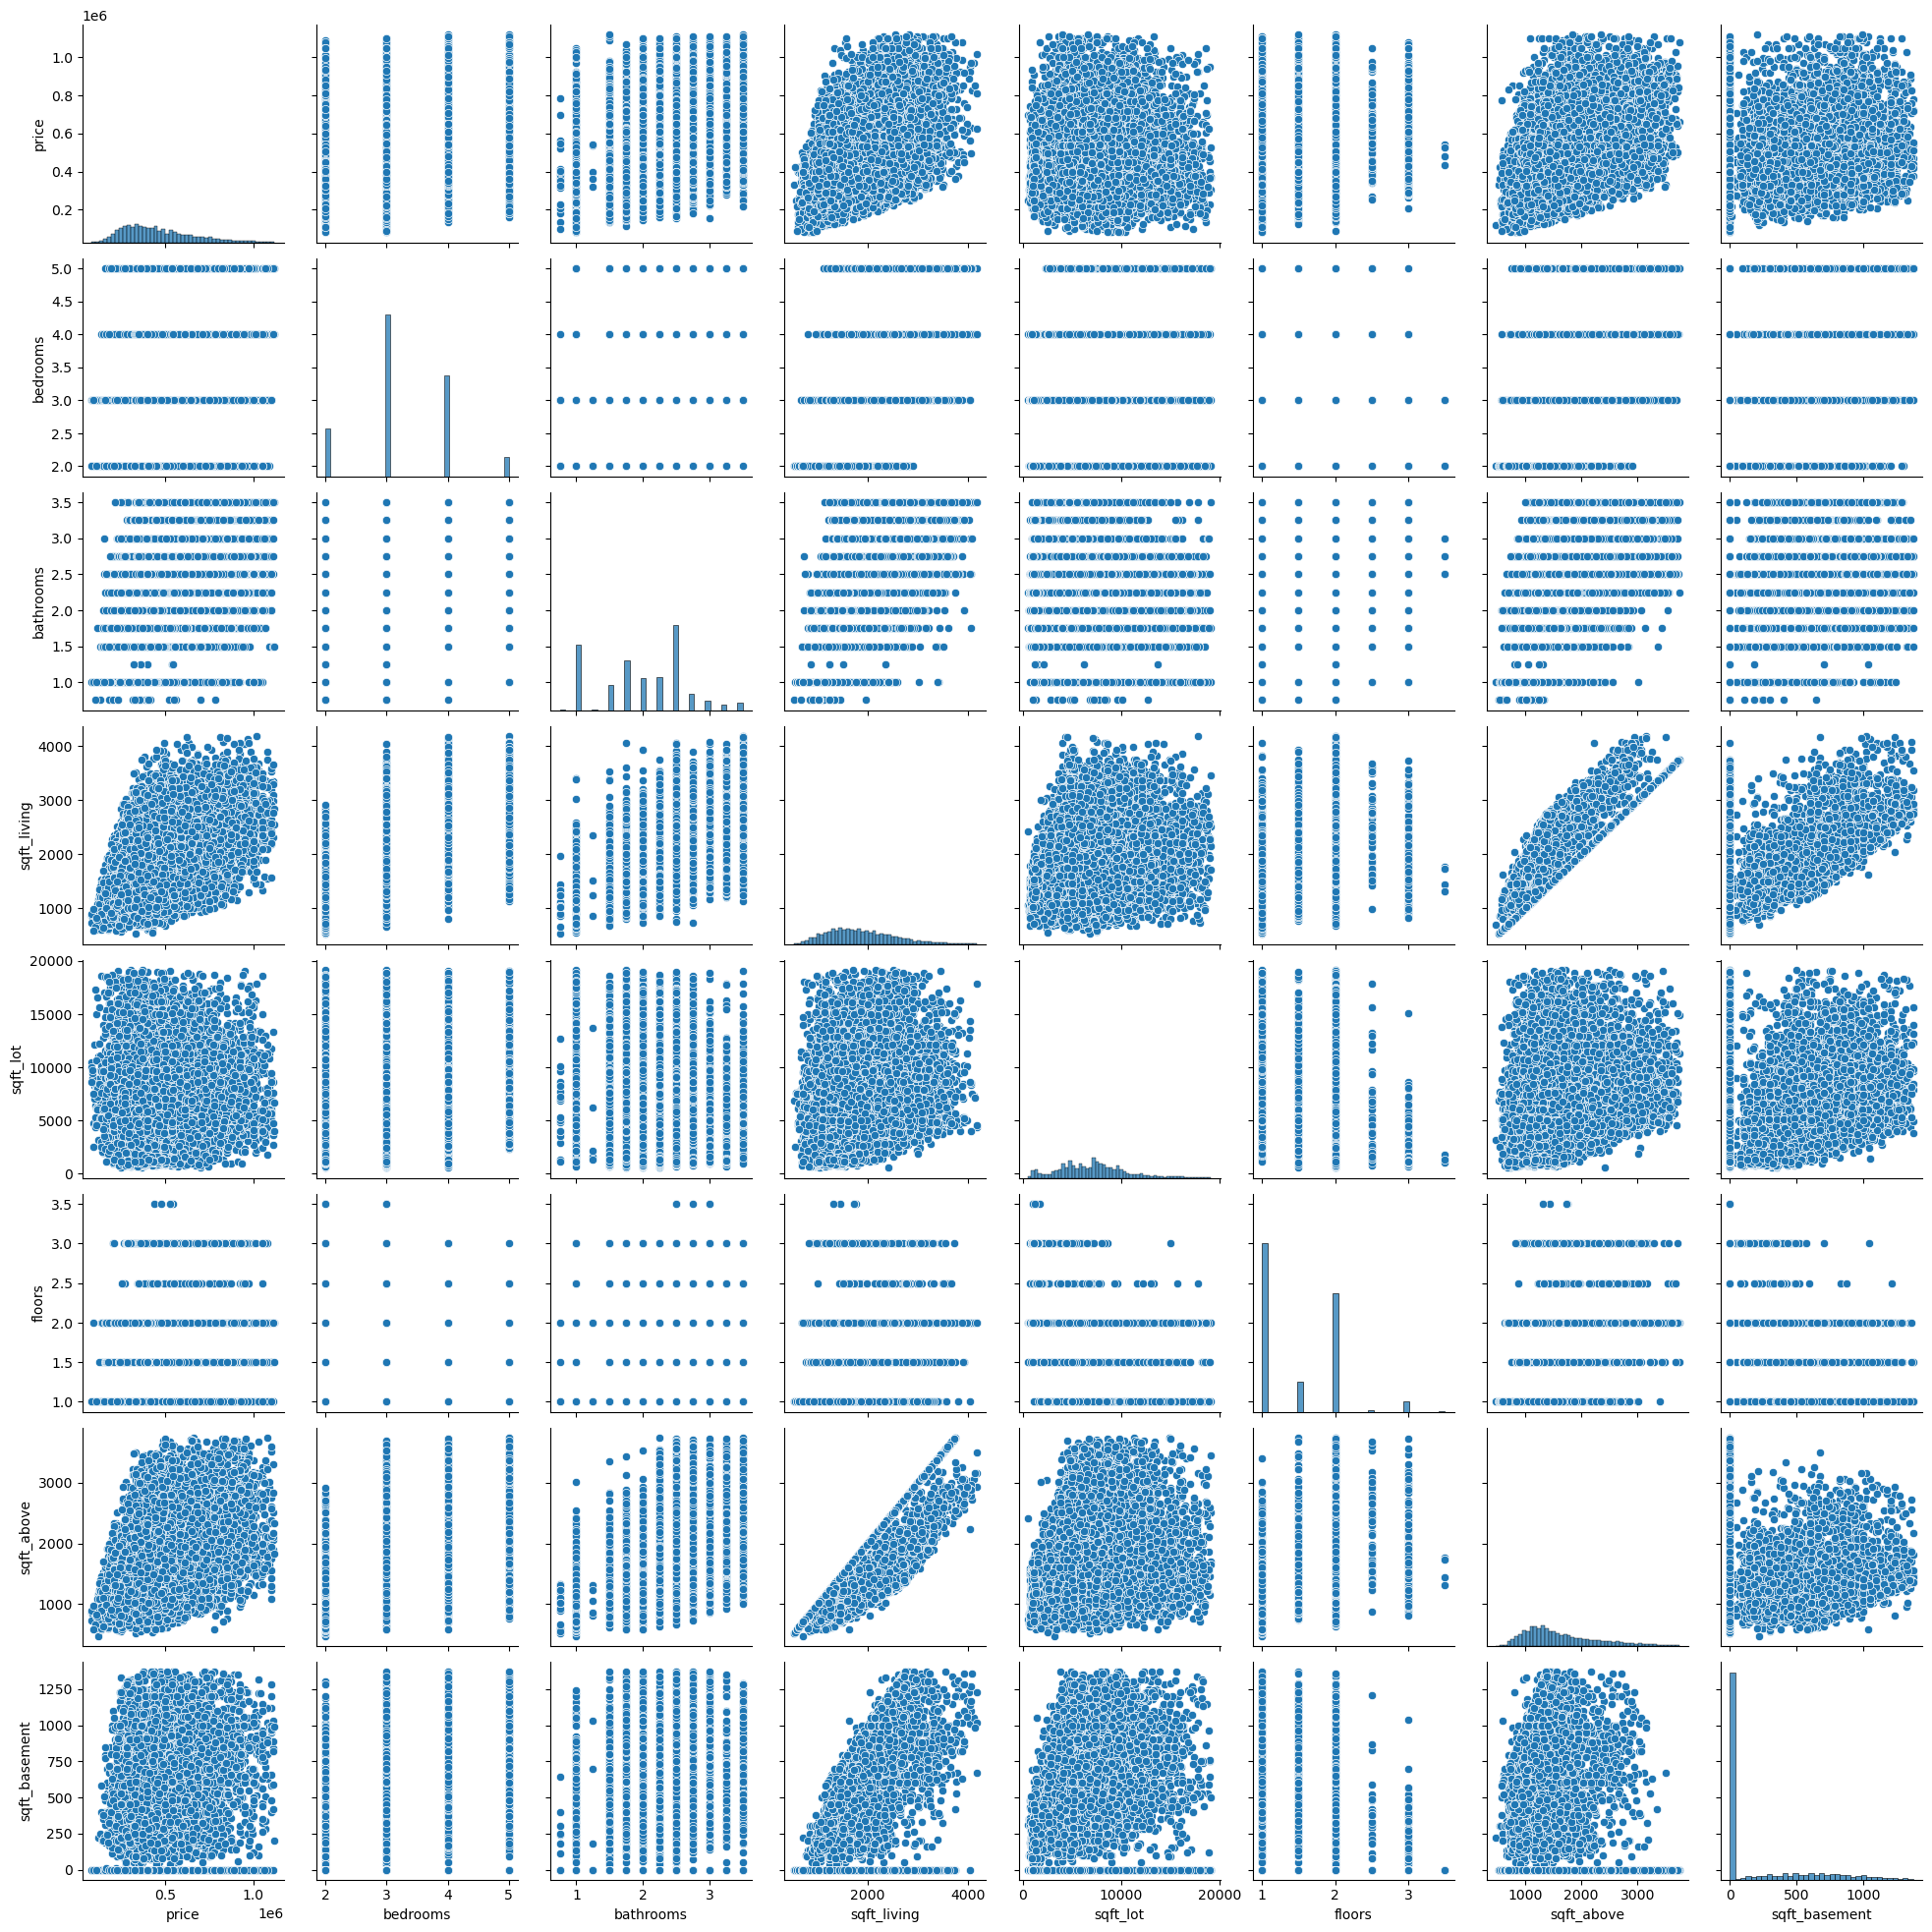

In [26]:
#Correlation matrix for numeric variables - visualization
sns.pairplot(numeric_df)
plt.show()

Observation: The correlation analysis above shows that sqft_living has the highest correlation with price. On the other hand, there is strong collinearity between numeric variables, especially sqft_lving having strong with sqft_above, bathroom and bedroom variables. Hence decision to use sqft_living only as the numeric variable in the model.

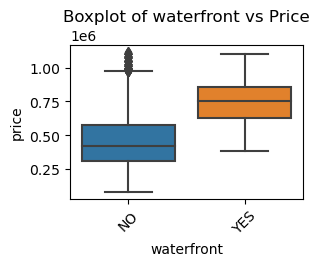

In [27]:
# Plotting 'waterfront' against price

x = data['waterfront']
y = data['price']

plt.figure(figsize=(3, 2))
sns.boxplot(x=x, y=y)
plt.title('Boxplot of waterfront vs Price')
plt.xticks(rotation=45)
plt.show()

Observation: Waterfront 'YES' meaning when a house has a waterfront, increases price of house

In [28]:
# Binary variable encoding

variable =  ['waterfront']

# Defining the map function
def binary_map(x):
    return x.map({'YES': 1, "NO": 0})

# Applying the function to the housing list
data[variable] = data[variable].apply(binary_map)

In [29]:
data['waterfront'].unique()

array([0, 1], dtype=int64)

In [30]:
data['waterfront'].value_counts()

waterfront
0    14079
1       15
Name: count, dtype: int64

Observation:
* waterfront variable - extremely limited houses have waterfronts i.e. 15 while 14079 do not have. Hence will exclude waterfront as a feature.

In [31]:
#Relationship between target and multi category categorical variables
categorical_vars = data[['view', 'condition', 'grade', 'zipcode']]
y = data['price']

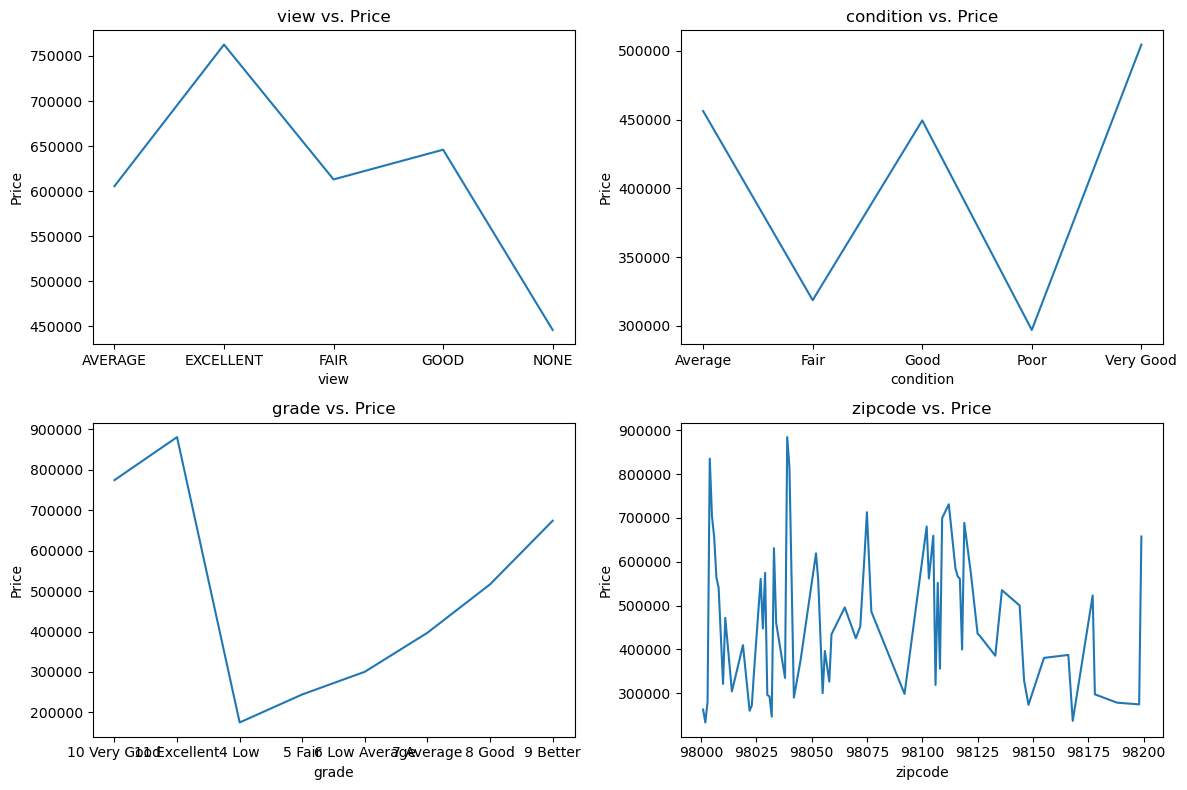

In [32]:
categorical_vars = data[['view', 'condition', 'grade', 'zipcode']]
y = data['price']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2

    ax = axes[row][col]
    grouped_data = data.groupby(var)['price'].mean()
    ax.plot(grouped_data.index, grouped_data.values)
    ax.set_xlabel(var)
    ax.set_ylabel('Price')
    ax.set_title(f'{var} vs. Price')

plt.tight_layout()
plt.show()

Observation: 
* View - Houses with excellent view are highest priced. Houses without view have lowest price
* Condition - As expected, houses in very good condition attract highest price while poor condition attract lowest price
* Grade - Grade seems like a similar measure to condition, hence will not use it in the modelling
* zipcode - Price varies significantly with zip code. Though we will need to categorize the zipcodes to high, medium and low price inorder to use encode this column for modelling

In [33]:
#zipcode analysis
zip_average_price = data.groupby('zipcode')['price'].mean().sort_values(ascending=False)
zip_average_price

zipcode
98039    884166.666667
98004    835107.123894
98040    814099.567568
98112    730990.924812
98075    712820.756098
             ...      
98001    262953.369565
98022    260125.429825
98032    246740.515464
98168    237121.409326
98002    233445.664516
Name: price, Length: 70, dtype: float64

In [34]:
zipcode_counts = data['zipcode'].value_counts()
print(zipcode_counts)

zipcode
98103    445
98115    428
98117    421
98038    403
98052    399
        ... 
98014     33
98077     27
98024     19
98070     18
98039      3
Name: count, Length: 70, dtype: int64


In [86]:
# Categorizing zipcodes

# Calculate the average house price per zip code
average_prices = data.groupby('zipcode')['price'].mean()

# Reverse the order of average prices
average_prices_reversed = average_prices.sort_values(ascending=False)

# Assign ranks to the zip codes based on reversed average house price
zip_rank = pd.qcut(average_prices_reversed, q=10, labels=False, duplicates='drop')
zip_rank = zip_rank.max() - zip_rank + 1

# Create a new column 'zip_rank' in the DataFrame to store the ranks
data['zip_rank'] = data['zipcode'].map(zip_rank)

In [87]:
grouped_data = data.groupby('zip_rank')['price'].mean()
print(grouped_data)

zip_rank
1     751547.244838
2     648195.115443
3     580909.375241
4     549560.216837
5     472396.948237
6     417590.666865
7     367580.174675
8     315817.835761
9     287821.157250
10    256728.833609
Name: price, dtype: float64


In [88]:
# Applying ordinal encoding to categorical variables

from sklearn.preprocessing import OrdinalEncoder

# categories for each variable
view_categories = ['EXCELLENT', 'GOOD', 'FAIR', 'AVERAGE', 'NONE']
condition_categories = ['Very Good', 'Average', 'Good', 'Fair', 'Poor']
zipcode_category_categories = ['High_Price', 'Med_Price', 'Low_Price']
grade_categories = ['11 Excellent', '10 Very Good', '9 Better','8 Good','7 Average','6 Low Average','5 Fair','4 Low']

# instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[view_categories, condition_categories, zipcode_category_categories, grade_categories])

# Fit and transform the categorical variables
encoded_data = encoder.fit_transform(data[['view', 'condition', 'zipcode_category','grade']])

# Add the encoded columns to the original DataFrame
data_encoded = data.copy()
data_encoded[['view', 'condition', 'zipcode_category', 'grade']] = encoded_data

# Print the updated DataFrame
print(data_encoded)

               id        date     price  bedrooms  bathrooms  sqft_living   
0      7129300520  10/13/2014  221900.0       3.0       1.00       1180.0  \
1      6414100192   12/9/2014  538000.0       3.0       2.25       2570.0   
2      2487200875   12/9/2014  604000.0       4.0       3.00       1960.0   
3      1954400510   2/18/2015  510000.0       3.0       2.00       1680.0   
4      1321400060   6/27/2014  257500.0       3.0       2.25       1715.0   
...           ...         ...       ...       ...        ...          ...   
14089   263000018   5/21/2014  360000.0       3.0       2.50       1530.0   
14090  6600060120   2/23/2015  400000.0       4.0       2.50       2310.0   
14091  1523300141   6/23/2014  402101.0       2.0       0.75       1020.0   
14092   291310100   1/16/2015  400000.0       3.0       2.50       1600.0   
14093  1523300157  10/15/2014  325000.0       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built   


In [89]:
data_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_category,zip_rank
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,4.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2.0,9
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,4.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,1.0,6
2,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,4.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,1.0,4
3,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,4.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,0.0,2
4,1321400060,6/27/2014,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,4.0,...,0.0,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0,2.0,9


In [90]:
# drop columns we will not be using in readiness for modelling
columns_to_drop = ['date', 'yr_built', 'yr_renovated', 'waterfront']
data_encoded = data_encoded.drop(columns_to_drop, axis=1)

In [91]:
data_encoded.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_category,zip_rank
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,4.0,1.0,4.0,1180.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,2.0,9
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,4.0,1.0,4.0,2170.0,400.0,98125,47.7210,-122.319,1690.0,7639.0,1.0,6
2,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,4.0,0.0,4.0,1050.0,910.0,98136,47.5208,-122.393,1360.0,5000.0,1.0,4
3,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,4.0,1.0,3.0,1680.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,0.0,2
4,1321400060,257500.0,3.0,2.25,1715.0,6819.0,2.0,4.0,1.0,4.0,1715.0,0.0,98003,47.3097,-122.327,2238.0,6819.0,2.0,9


## 6.0 Modelling

### Simple Linear Regression model

From our numerical variables,we etablished that 'sqft_living' has the highest correlation with price. We will build a simple linear regression model as a starter.

In [112]:
data_encoded.corr()["price"]

id                  0.033767
price               1.000000
bedrooms            0.254250
bathrooms           0.381901
sqft_living         0.558078
sqft_lot           -0.051682
floors              0.251676
view               -0.215688
condition          -0.071898
grade              -0.577697
sqft_above          0.449579
sqft_basement       0.213556
zipcode             0.014861
lat                 0.466096
long                0.010351
sqft_living15       0.494310
sqft_lot15         -0.057081
zipcode_category   -0.645380
zip_rank           -0.719440
Name: price, dtype: float64

In [93]:
#model_1 
y = data_encoded["price"]
X_model_1 = data_encoded[["sqft_living"]]

In [94]:
model_1 = sm.OLS(y, sm.add_constant(X_model_1))
model_1_results = model_1.fit()

print(model_1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     6374.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:50:00   Log-Likelihood:            -1.8904e+05
No. Observations:               14094   AIC:                         3.781e+05
Df Residuals:                   14092   BIC:                         3.781e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.456e+05   4134.893     35.209      

Interpretation and Observations:
The model is statistically significant overall, with an F-statistic p-value well below 0.05
The model explains about 31% of the variance in price
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
Per the model - If the house had 0 sqft, we would expect price of $145600 - which implies that there are other factors that drive price other than sqft_living.

* While 'sqft_living' showed the highest correlation to price amongst other numerical variables, model_1 results shows that it explain price by 31.1% only.
* With this finding, we will create a extra simple LR models from the other numerical variables

In [95]:
#model_2
y = data_encoded["price"]
X_model_2 = data_encoded[["bathrooms"]]

In [96]:
model_2 = sm.OLS(y, sm.add_constant(X_model_2))
model_2_results = model_2.fit()

print(model_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2406.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:50:05   Log-Likelihood:            -1.9056e+05
No. Observations:               14094   AIC:                         3.811e+05
Df Residuals:                   14092   BIC:                         3.811e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.309e+05   4857.948     47.530      0.0

Interpretation: 
* Model is significant. Bathrooms explain price by 14.6%
* Next step - create more simple linear regression models 

In [97]:
#model_3
y = data_encoded["price"]
X_model_3 = data_encoded[["sqft_above"]]

In [98]:
model_3 = sm.OLS(y, sm.add_constant(X_model_3))
model_3_results = model_3.fit()

print(model_3_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     3570.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:50:09   Log-Likelihood:            -1.9008e+05
No. Observations:               14094   AIC:                         3.802e+05
Df Residuals:                   14092   BIC:                         3.802e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.322e+05   4043.152     57.420      0.0

In [99]:
#model_4
y = data_encoded["price"]
X_model_4 = data_encoded[["sqft_living15"]]

In [100]:
model_4 = sm.OLS(y, sm.add_constant(X_model_4))
model_4_results = model_4.fit()

print(model_4_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     4557.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:50:11   Log-Likelihood:            -1.8969e+05
No. Observations:               14094   AIC:                         3.794e+05
Df Residuals:                   14092   BIC:                         3.794e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.297e+05   5058.895     25.630

### Multiple Linear regression models

#### A model with more numerical variables

In [101]:
#model_5
y = data_encoded["price"]
X_model_5 = data_encoded[["sqft_living", "bathrooms", "sqft_above", "sqft_living15", 'bedrooms', 'sqft_basement']]

In [102]:
model_5 = sm.OLS(y, sm.add_constant(X_model_5))
model_5_results = model_5.fit()

print(model_5_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1220.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:50:16   Log-Likelihood:            -1.8872e+05
No. Observations:               14094   AIC:                         3.775e+05
Df Residuals:                   14087   BIC:                         3.775e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.588e+05   6645.021     23.903

Observation:
* including 5 numerical variables in model_5 gave us R-squared of 34.2% which is a minor improvement from model_1 which had sqft_living variable only. 
* Model_5 has a high condition number showing strong multicolliniarity in numeric variables - which was implied from earlier analyis - hence decision to use 'sqft_living' only.
* However, in the next model, we will mix numeric and categorical variables.
* sqft_above and bedrooms produced negative coefficients - which was against our expectation.

In [123]:
#model_6 - Modelling for both numerical and categorical variables
y = data_encoded["price"]
X_model_6 = data_encoded[["sqft_living", "bathrooms", "sqft_above", "sqft_living15",'bedrooms', 'lat', 'sqft_basement','floors', 'sqft_lot', 'view', 'condition','grade']]

In [124]:
model_6 = sm.OLS(y, sm.add_constant(X_model_6))
model_6_results = model_6.fit()

print(model_6_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1894.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:47:00   Log-Likelihood:            -1.8490e+05
No. Observations:               14094   AIC:                         3.698e+05
Df Residuals:                   14081   BIC:                         3.699e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.782e+07   3.63e+05    -76.624

Observation:
* In model_6 we added categorical variables to to the numerical variables and this has increased R-squared to 60.9%

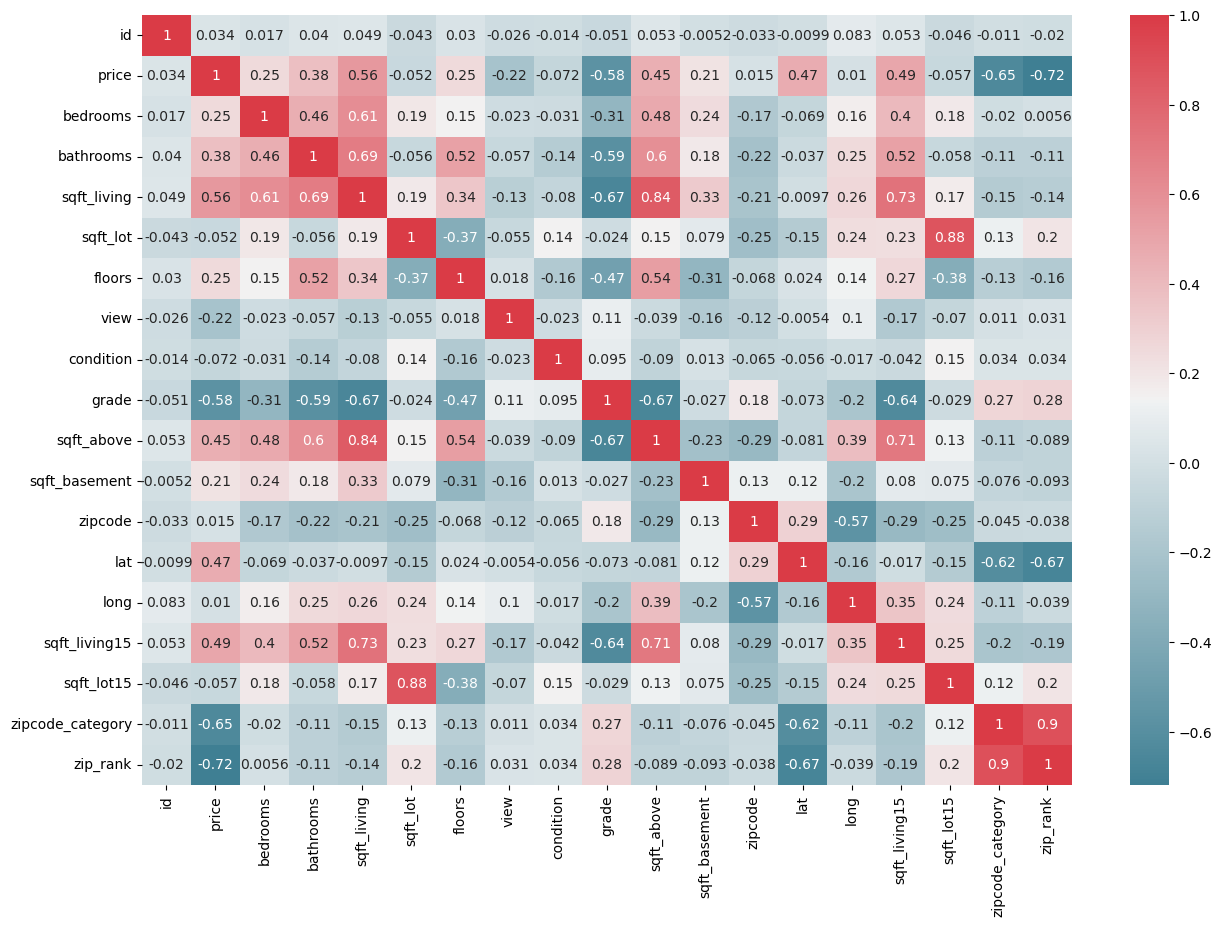

In [130]:
# Heatmap
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data_encoded.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data_encoded)


### Standardizing numerical variables

Standardizing will enable model evaluation. Standardization or normalization puts the units of the coefficients obtained on a similar scale.
Our approach will be to standardize only the predictor numerical variables.

In [137]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the numerical features and target variable
numerical_features = ["sqft_living", "bathrooms", "sqft_above", "sqft_living15",'bedrooms', 'lat', 'sqft_basement','floors', 'sqft_lot']
ordinal_features = ['view', 'condition','grade']

target_variable = ["price"]

X_numerical = data_encoded[numerical_features]
X_ordinal = data_encoded[ordinal_features]
y = data_encoded[target_variable]

# Standardize the numerical features
scaler = StandardScaler()
X_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_numerical), columns=numerical_features)

# Combine the standardized numerical features with the ordinal features & target variable into one df
X_combined = pd.concat([X_numerical_scaled, X_ordinal], axis=1)


In [139]:
X_combined.head()

,sqft_living,bathrooms,sqft_above,sqft_living15,bedrooms,lat,sqft_basement,floors,sqft_lot,view,condition,grade
0,-1.046615,-1.518114,-0.693853,-0.918704,-0.351822,-0.339880,-0.658079,-0.877499,-0.425296,4.0,1.0,4.0
1,1.096015,0.385844,0.879451,-0.270468,-0.351822,1.168188,0.451087,0.965366,0.041549,4.0,1.0,4.0
2,0.155724,1.528219,-0.900448,-0.881662,0.934116,-0.270874,1.865275,-0.877499,-0.615904,4.0,0.0,4.0
3,-0.275885,0.005052,0.100745,-0.066736,-0.351822,0.419186,-0.658079,-0.877499,0.287287,4.0,1.0,3.0
4,-0.221934,0.385844,0.156367,0.744486,-0.351822,-1.788286,-0.658079,0.965366,-0.082494,4.0,1.0,4.0


In [140]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

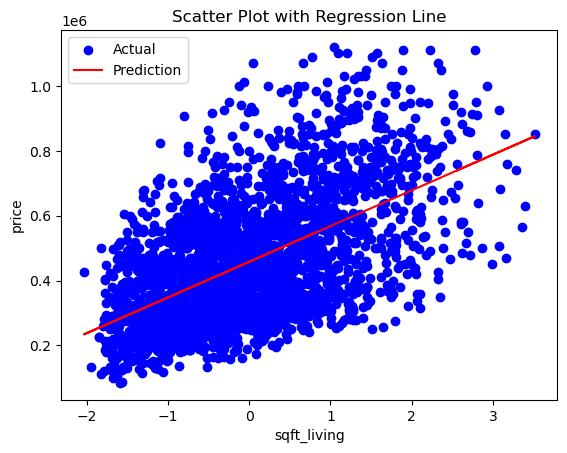

In [144]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression model - mimicking model_1
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train[['sqft_living']], y_train)

# Make predictions on the test data
y_pred = model.predict(X_test[['sqft_living']])


# Scatter plot of the test data
plt.scatter(X_test['sqft_living'], y_test, color='blue', label='Actual')

# Regression line
plt.plot(X_test['sqft_living'], y_pred, color='red', label='Prediction')

# Set plot labels and title
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scatter Plot with Regression Line')

# Display legend
plt.legend()

In [145]:
# Multiple Linear regresssion with scaled variables
# model_7
y = data_encoded[target_variable]
X_combined = pd.concat([X_numerical_scaled, X_ordinal], axis=1)

In [146]:
model_7 = sm.OLS(y, sm.add_constant(X_combined))
model_7_results = model_7.fit()

print(model_7_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1894.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:17:40   Log-Likelihood:            -1.8490e+05
No. Observations:               14094   AIC:                         3.698e+05
Df Residuals:                   14081   BIC:                         3.699e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.623e+05   1.03e+04     83.365

##### Model evaluation based on the model coefficients and statistical significance (p-values):

* Based on this very small (0.00) f_pvalue, we can say that the model is statistically significant
* The 'sqft_living' has a positive coefficient with a statistically significant p-value (p < 0.001), indicating that it has a significant positive relationship with the target variable. An increase in the square footage of living space is associated with an increase in the predicted price.

* The 'bathrooms' has a negative coefficient with a statistically significant p-value (p < 0.001), suggesting that a higher number of bathrooms is associated with a decrease in the predicted price. This can also be interpretted as, too many bathrooms do not make sense in a house.

* The sqft_above, sqft_basement, and condition have p-values above 0.05, indicating that their coefficients are not statistically significant. These variables may not have a significant impact on the predicted price, hence we may consider dropping them from the model.

* Other variables such as sqft_living15, bedrooms, lat, floors, sqft_lot, view, and grade have statistically significant coefficients (p < 0.05), suggesting they have a significant impact on the predicted price.

* Model's overall goodness of fit - The above variables have been able to explain 61.7% of the price variance only. This might indicate that there are other variables that affect price that we've not considered.

* The Omnibus, Jarque-Bera (JB) tests: with a low p-value (p < 0.05) in the Omnibus and JB tests suggests the residuals are not normally distributed.

Observation: Shows a linear relation although not strong.

## 7.0 Regression results

## 8.0 Recommendations